## Task 1 - Customer Behaviours

In the first file
’marketing demographics.csv’, you find basic information about the customers:
(i) education level,
(ii)marital status,
(iii) yearly income,
(iv) country,
(v) age, and
(vi) number of children.

In the second file ’marketing business.csv’, you can find information about the customer’s interaction with the company:
(i) total amount of money spent on items,
(ii) total number of purchases, also separately for purchases performed online and in the physical store,
(iii) the number of times the customer accepted some campaign offers in the past,
(iv) the number of times the customer visited the company website in the month before
the most recent campaign,
(v) the number of times the customer made a complaint in the past, and
(vi)the customer’s response to the most recent campaign

Perform some descriptive analysis tasks on the 2 given datasets. As the first step, import and then
combine the files using the single shared column, ’ID’. In each question, unless stated otherwise, use this
complete dataset to calculate the answer (so if I ask you to filter, it applies only to that specific question,
and you do not use this filtered data in the next question)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

pd.options.mode.chained_assignment = None  # default='warn'

dem_data = pd.read_csv('Datasets/marketing_demographics.csv')
bus_data = pd.read_csv('Datasets/marketing_business.csv')

full_data = pd.merge(dem_data, bus_data)
full_data

,ID,Education,Marital_Status,Income,Country,Age,Children,Total_Amount,Total_Purchase,Web_Purchase,Store_Purchase,Accepted_Campaigns,Website_Visit,Complaint,Response
0,0,Graduation,Married,70951.0,SA,37,0,1198,16,3,13,0,1,0,0
1,1,Graduation,Single,57091.0,CA,61,0,577,17,7,10,1,5,0,1
2,9,Master,Single,46098.0,CA,47,2,120,7,3,4,0,8,0,0
3,13,PhD,Widow,25358.0,SA,75,1,32,4,1,3,0,6,0,0
4,17,PhD,Married,60491.0,SP,51,1,1028,24,6,18,0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,11178,Master,Single,42394.0,GER,50,1,32,4,1,3,0,7,0,0
2212,11181,PhD,Married,156924.0,CA,73,0,8,0,0,0,0,0,0,0
2213,11187,Basic,Single,26487.0,CA,44,1,69,6,2,4,0,5,0,0
2214,11188,Graduation,Together,26091.0,SP,65,2,89,6,2,4,0,5,0,0


In [11]:
#familiarizing with dataset
full_data.isnull().sum()

ID                    0
Education             0
Marital_Status        0
Income                0
Country               0
Age                   0
Children              0
Total_Amount          0
Total_Purchase        0
Web_Purchase          0
Store_Purchase        0
Accepted_Campaigns    0
Website_Visit         0
Complaint             0
Response              0
dtype: int64

In [4]:
full_data.dtypes

ID                      int64
Education              object
Marital_Status         object
Income                float64
Country                object
Age                     int64
Children                int64
Total_Amount            int64
Total_Purchase          int64
Web_Purchase            int64
Store_Purchase          int64
Accepted_Campaigns      int64
Website_Visit           int64
Complaint               int64
Response                int64
dtype: object

Calculate the average of ’Total Amount’ and ’Total Purchase’ for each Education category. Do you
find the same category to have the highest average for both amount and purchase?

In [12]:
purch_avg = full_data[['Education', 'Total_Amount', 'Total_Purchase']].groupby(full_data['Education']).mean()
purch_avg.sort_values(by = ['Total_Amount'], ascending = False)

#After sorting one column, and being the dataframe relatively small,
#it is enough to check just with naked eye that customers with a PhD are those
#spending on average the most and purchasing on aveage the most items.

,Total_Amount,Total_Purchase
Education,,
PhD,676.733888,13.492723
Graduation,621.686380,12.695341
Master,609.767123,12.468493
2n Cycle,494.930000,11.680000
Basic,81.796296,5.222222


• Filter your data for countries from which there is at least 200 customers. From which country in this
filtered dataset you can find the most complaints (column Complaint)?

In [33]:
#checking what are all the countries i have in the list
countries = full_data.groupby('Country').size()
countries

Country
AUS     147
CA      266
GER     116
IND     147
ME        3
SA      337
SP     1093
US      107
dtype: int64

In [34]:
countries200 = countries.index[countries >= 200]
countries200

Index(['CA', 'SA', 'SP'], dtype='object', name='Country')

In [41]:
full_data200 = full_data[full_data['Country'].isin(countries200)]
full_data200[['Country','Complaint']].groupby('Country').sum().sort_values(by = 'Complaint', ascending = False)

#the country with at least 200 customers that has reported the highest
#amount of complaints is SP (Spain?).
#It is also the one with the highest number of customers overall though...

,Complaint
Country,
SP,14
SA,3
CA,2


• Calculate a new column that is 0, if the customer has 0 children, and 1 otherwise (so if the customer
has at least 1 child). Do customers with or without children have higher average Income? Check
whether the difference is statistically significant using a t-test!

In [71]:
#creating a new DF where to add my new column and do data manipulation, CI stands fro Child/Income
full_data_CI = full_data[['ID', 'Income', 'Children']]

#creating a list to host values to be converted into a column later
child_bool = []

for i in full_data_CI['Children']:
    if i == 0:
        child_bool.append(0)
    else:
        child_bool.append(1)

#assigning the values from the list to a new created column, and dropping the old one
full_data_CI['child_bool'] = child_bool
full_data_CI.drop(columns='Children').head()

,ID,Income,child_bool
0,0,70951.0,0
1,1,57091.0,0
2,9,46098.0,1
3,13,25358.0,1
4,17,60491.0,1


In [74]:
#checking what is the average income for these 2 groups

full_data_CI_grouped=full_data_CI.groupby('child_bool').Income.mean()
full_data_CI_grouped

#it seems that customers with children are having a lower average income


child_bool
0    65705.565561
1    46865.626027
Name: Income, dtype: float64

In [81]:
#so basically here we have 2 samples (S1,S2): customers w/children (S1) and customers w/o children(S2).
# Ideally we think that having children does not affect the income
#(the means of sample 1 and sample 2 are equal).
# However we are observing that if you have children, you have a lower income
#(means of s1 and s2 are different)
# lets see how significant is our observation of this difference:
#we can use a two-sampled (aka "indipendent") t-test
# H0: S1 = S2
# H1: S1 != S2

from scipy import stats

S1 = full_data_CI[full_data_CI.child_bool == 1].Income
S2 = full_data_CI[full_data_CI.child_bool == 0].Income
stats.ttest_ind(S1,S2)

#So, even if the significance level was not specified, it looks that the p-value is smaller than
# any of the classic chosen ones (0.05, 0.01). This means that the probabilities of
#the 2 means being equal is super low, and we can reject that hypothesis.
#Instead, we can very confidently say that the income means of the
#2 groups (having and not-having children) are significantly different.

Ttest_indResult(statistic=-16.9071717250489, pvalue=2.08492231266765e-60)

• The company believes that their main target group is the customers aged between 18 and 45 years.
To check whether it is reflected in the sales, check whether the average number of Web Purchase is
higher for the customers in the target age group than for other customers. Do you have the same
result when you use Store Purchase? (Hint: you can create a new column that is 1 when the customer
is in the target age group and 0 otherwise).

In [108]:
#creating a new DF where to add my new column and do data manipulation
full_data_target = full_data[['ID', 'Age', 'Web_Purchase', 'Store_Purchase', 'Income']]

#creating a list to host values to be converted into a column later
target_agegroup_list = []
target_agegroup = list(range(18,46))

for i in full_data_target['Age']:
    if i in target_agegroup:
        target_agegroup_list.append(1)
    else:
        target_agegroup_list.append(0)

#assigning the values from the list to a new created column, and dropping the old one
full_data_target['Target_Agegroup'] = target_agegroup_list
full_data_agegroup = full_data_target.drop(columns='Age')
#full_data_agegroup

In [119]:
#lets see if the strategy is correct and the avg number of Store Purchases is actually higher
#for the selected target group

full_data_agegroup[['Web_Purchase', "Store_Purchase",'Target_Agegroup']].groupby('Target_Agegroup').mean()

#it seems that the selected target group does not buy as much as the other agegroup,
#neither online nor from the store. Can it be because older people are wealthier?

,Web_Purchase,Store_Purchase
Target_Agegroup,,
0,4.293317,8.762995
1,3.525000,7.688333


• Calculate the correlation between the columns Total Purchase, Age, and Income. Which of the
other two variables seem to be more related to Total Purchase? Based on this and the previous
question, do you think it would be useful for the company to focus a lot of efforts on age-based
segmentation/marketing?

                     Age  Total_Purchase    Income
Age             1.000000        0.165397  0.161791
Total_Purchase  0.165397        1.000000  0.625755
Income          0.161791        0.625755  1.000000


<AxesSubplot:>

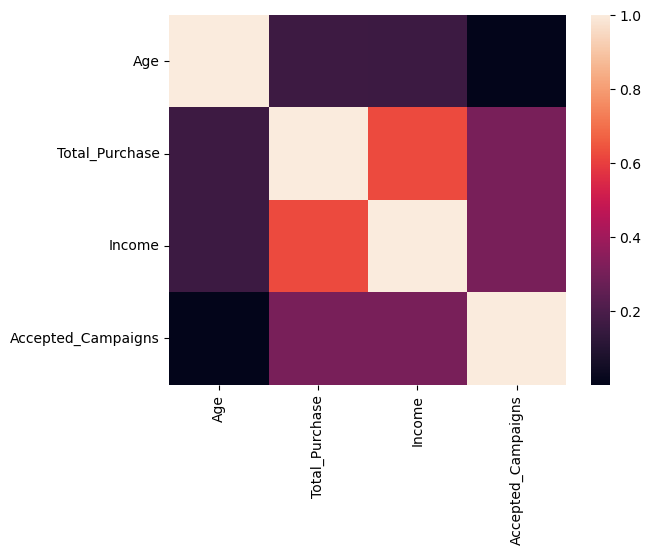

In [194]:
#Calculating and printing the correlation on the variables we are interested in
correlation = full_data[['Age', 'Total_Purchase', 'Income']].corr()
print(correlation)

#Displaying it in one of my favourite charts for visualizing outcomes on correlation
sns.heatmap(corr_ex)

#it seems that the correlation between total_purchase and Age is pretty low (0.165).
# this means that the Total Purchase variable grows almost independently from the Age.
#there is a moderately strong correlation between Total Purchses and Income (0.625), but
# at the same time it seems Income does not grow in correlation with Age ( corr = 0.161)
# so i would say to the company thta following a marketing
#strategy based on age groups is not worthy


## Task 2 - World Happiness Report

you will have to work with the World Happiness Report dataset (’happiness.csv’; when importing, use sep = ’;’). The main Score asks respondents to think of a ladder with the best possible life for them being a 10 and the worst possible life being a 0 and to rate their own current lives on that scale.
The other columns estimate the extent to which each of six factors – economic production,
social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life
evaluations higher in each country. In the following you have to perform some data preparation tasks;
this time, in each task use the data that you obtain after performing the previous steps (so in the end you
will obtain a dataframe that is modified according to all the specifications)

In [3]:
happiness_full = pd.read_csv('Datasets/happiness.csv', sep = ';')
happiness_full

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,NaN,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,NaN,0.225,0.235,0.035


In [262]:
#checking for null values

happiness_full.isnull().sum()

Overall rank                     0
Country or region                0
Score                            0
GDP per capita                   6
Social support                   6
Healthy life expectancy         15
Freedom to make life choices    10
Generosity                      12
Perceptions of corruption        3
dtype: int64

In [263]:
#checking what is the size of the different columns
happiness_full.count()

Overall rank                    156
Country or region               156
Score                           156
GDP per capita                  150
Social support                  150
Healthy life expectancy         141
Freedom to make life choices    146
Generosity                      144
Perceptions of corruption       153
dtype: int64

• Remove outliers: (i) for the column ’Healthy life expectancy’, remove the top 3% of values, and (ii)
for column ’Perceptions of corruption’, remove the bottom 2%

In [4]:
#finding the quantile that marks the top 3% and the bottom 2%

cut_off_lifeexp = happiness_full['Healthy life expectancy'].quantile(0.97)
cut_off_corrup = happiness_full['Perceptions of corruption'].quantile(0.02)

#adjusting the original dataset to cosider only values below the top 3%, and over the bottom 2%
happiness = happiness_full[(happiness_full['Healthy life expectancy'] < cut_off_lifeexp) &
                      (happiness_full['Perceptions of corruption'] > cut_off_corrup)]

#adding a count of the new dataset to see how the clening of outliers has actually resized it.
#seems a lot of null values in the surrounding columns were linked to the outliers of life exp and corruption
happiness.count()

Overall rank                    129
Country or region               129
Score                           129
GDP per capita                  127
Social support                  125
Healthy life expectancy         129
Freedom to make life choices    125
Generosity                      126
Perceptions of corruption       129
dtype: int64

In [5]:
#in the "outliers" were included also NaN values
happiness.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  2
Social support                  4
Healthy life expectancy         0
Freedom to make life choices    4
Generosity                      3
Perceptions of corruption       0
dtype: int64

In [268]:
#Before cntinuing, I am curious to see what coutries got dropped by this cleaning.
#so i am creatung one df "a" with the contry list from the full dataset
#one dataframe "b" with the countries of the dataset after the cleaning
#and merging the second one on the first one

a = happiness_full[['Country or region']]
b = happiness[['Country or region']]

c = a.merge(b, how = 'left', indicator = True)

#I have used the parameter 'indicator' so i can see to what df the value was originally from
#and use it to filter and see what countries where in the original ('left') df
#and have been now removed  by the cleaning

c[c['_merge'] == 'left_only']

# It seems that the Outliers removal on corruption and life expectancy have made us lose
# US, Switzerland and Singapore among others, which might have been interesting to consider in a
#happiness data analysis

,Country or region,_merge
5,Switzerland,left_only
7,New Zealand,left_only
18,United States,left_only
23,France,left_only
29,Spain,left_only
32,Uruguay,left_only
33,Singapore,left_only
36,Bahrain,left_only
45,Kosovo,left_only
46,Argentina,left_only


In [269]:
#maybe because they were too healty or too corrupt. lets check

happiness_full[happiness_full['Country or region'].isin(['Singapore', 'Switzerland', 'Bosnia and Herzegovina','Moldova','New Zealand'])]

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
5,6,Switzerland,7.480,NaN,1.526,1.052,0.572,0.263,0.343
7,8,New Zealand,7.307,1.303,1.557,NaN,0.585,0.330,0.380
33,34,Singapore,6.262,1.572,1.463,1.141,NaN,0.271,0.453
70,71,Moldova,5.529,0.685,1.328,0.739,0.245,0.181,0.000
77,78,Bosnia and Herzegovina,5.386,0.945,1.212,0.845,NaN,0.263,0.006


In [270]:
#it makes sense with our cleaning, here below the cutoffs for reference

print('removed all above life exp',cut_off_lifeexp)
print('removed all below corruption', cut_off_corrup)

removed all above life exp 1.0499999999999998
removed all below corruption 0.006



• Handle missing values: (i) remove countries (rows) where there are 3 or more missing values; (ii) fill
in the rest of the missing values with the mean value of their column

In [11]:
happiness.dropna(thresh = 7, inplace = True)

In [16]:
happiness.fillna(happiness.mean(), inplace = True)

#using the below to check if any NaN values are still left. All got replaced
happiness[happiness.isna().any(axis=1)]

/tmp/ipykernel_36130/1725177523.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happiness.fillna(happiness.mean(), inplace = True)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption



• Create a categorical version of ’GDP per capita’ column with four categories and corresponding
labels (keep also the original column): (i) below 0.58, ’Low’, (ii) between 0.58 and 0.96, ’Average’,
(iii) between 0.96 and 1.23, ’High’, and (iv) above 1.23, ’Very High’.

In [18]:
bins = [-0.01, 0.58, 0.96, 1.23, 50]
labels = ['Low', 'Average', 'High', 'Very High']

happiness['GDP categ'] = pd.cut(happiness['GDP per capita'] , bins = bins, labels = labels)
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP categ
0,1,Finland,7.769,1.340,1.587000,0.986,0.596,0.153,0.393,Very High
1,2,Denmark,7.600,1.383,1.573000,0.996,0.592,0.252,0.410,Very High
2,3,Norway,7.554,1.488,1.582000,1.028,0.603,0.271,0.341,Very High
3,4,Iceland,7.494,1.380,1.624000,1.026,0.591,0.354,0.118,Very High
4,5,Netherlands,7.488,1.396,1.522000,0.999,0.557,0.322,0.298,Very High
...,...,...,...,...,...,...,...,...,...,...
150,151,Yemen,3.380,0.287,1.163000,0.463,0.143,0.108,0.077,Low
151,152,Rwanda,3.334,0.359,0.711000,0.614,0.555,0.217,0.411,Low
152,153,Tanzania,3.231,0.476,0.885000,0.499,0.417,0.276,0.147,Low
153,154,Afghanistan,3.203,0.350,1.202944,0.361,0.000,0.158,0.025,Low



• Scale all the numeric columns using the StandardScaler transformation.

In [31]:
from sklearn.preprocessing import MinMaxScaler

data_mms = MinMaxScaler()
#here below i have created a list of the columns i want to scale, to use it in the loop
df_columns = ['Score','GDP per capita','Social support','Healthy life expectancy',
            'Freedom to make life choices','Generosity','Perceptions of corruption']

for i in df_columns:
    #fitting in the scaler instance the data of the [i] column running in the loop
    data_mms.fit(happiness[[i]])
    #replacing the [i] original column data with the corresponding transformed data
    happiness[[i]] = data_mms.transform(happiness[[i]])
    
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,GDP categ
0,1,Finland,1.000000,0.795724,0.970305,0.946257,0.944532,0.270318,0.955112,Very High
1,2,Denmark,0.965622,0.821259,0.959069,0.955854,0.938193,0.445230,0.997506,Very High
2,3,Norway,0.956265,0.883610,0.966292,0.986564,0.955626,0.478799,0.825436,Very High
3,4,Iceland,0.944060,0.819477,1.000000,0.984645,0.936609,0.625442,0.269327,Very High
4,5,Netherlands,0.942840,0.828979,0.918138,0.958733,0.882726,0.568905,0.718204,Very High
...,...,...,...,...,...,...,...,...,...,...
150,151,Yemen,0.107201,0.170428,0.630016,0.444338,0.226624,0.190813,0.167082,Low
151,152,Rwanda,0.097844,0.213183,0.267255,0.589251,0.879556,0.383392,1.000000,Low
152,153,Tanzania,0.076892,0.282660,0.406902,0.478887,0.660856,0.487633,0.341646,Low
153,154,Afghanistan,0.071196,0.207838,0.662074,0.346449,0.000000,0.279152,0.037406,Low
